In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import numpy as np
from matplotlib import ticker, cm

# PLUMED masterclass 21.2: Statistical errors in MD (answers)

## Getting started

To open this notebook so that it can be executed follow the instructions about installing the plumed masterclass environment for conda that can be found here:

https://www.plumed.org/doc-v2.7/user-doc/html/masterclass-21-1.html

Once you have the `plumed-masterclass` environment activated issue the following command from the notebooks directory of the tar ball:

```
jupyter-notebook
```

This will open the notebook so that you can run plumed from within it.

## Exercises

### Exercise 1: Calculating the average value of a CV

The filled in plumed input is as follows:

In [2]:
pex1 = '''data: READ FILE=../../data/uncorrelated_data VALUES=rand
          av: AVERAGE ARG=data STRIDE=1
          PRINT ARG=av FILE=colvar'''

We can run PLUMED using this input from python as follows.  

In [3]:
!mkdir ../Exercises
# Make a directory to hold the exercise
!mkdir ../Exercises/Exercise_1
# Output the input file to the plumed.dat file
f = open("../Exercises/Exercise_1/plumed.dat", "w")
f.write( pex1 )
f.close()
# Run PLUMED
!cd ../Exercises/Exercise_1 && plumed driver --noatoms > /dev/null

We can now use the data we generated by runing plumed above to draw a graph of the average as a function of the number of data points we compute it from.

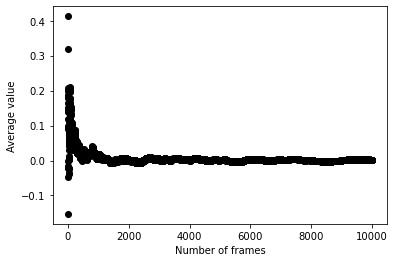

In [5]:
data = np.loadtxt("../Exercises/Exercise_1/colvar")

plt.plot( data[:,0], data[:,1], 'ko')
plt.xlabel("Number of frames")
plt.ylabel('Average value')
plt.show()

### Exercise 2 : Calculating the free energy

The filled in plumed input is as follows

In [10]:
pex2 = '''UNITS NATURAL
          data: READ FILE=../../data/uncorrelated_data VALUES=rand
          hhh: HISTOGRAM ARG=data STRIDE=1 GRID_MIN=-4.5 GRID_MAX=4.5 GRID_BIN=100 KERNEL=DISCRETE
          fes: CONVERT_TO_FES GRID=hhh TEMP=1
          DUMPGRID GRID=fes FILE=fes.dat'''

We can run PLUMED using this input from python as follows.

In [11]:
# Make a directory to hold the exercise
!mkdir ../Exercises/Exercise_2
# Output the input file to the plumed.dat file
f = open("../Exercises/Exercise_2/plumed.dat", "w")
f.write( pex2 )
f.close()
# Run PLUMED
!cd ../Exercises/Exercise_2 && plumed driver --noatoms > /dev/null

mkdir: ../Exercises/Exercise_2: File exists


We now read in the data from fes.dat and generate the graph showing the free energy surface.

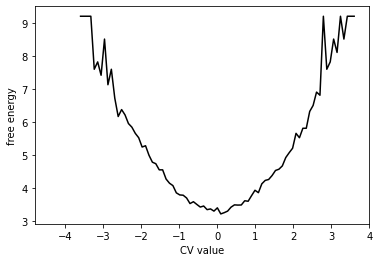

In [12]:
data = np.loadtxt("../Exercises/Exercise_2/fes.dat")

plt.plot( data[:,0], data[:,1], 'k-')
plt.xlabel("CV value")
plt.ylabel('free energy')
plt.show()

### Exercise 3: Calculating the fluctuations for a CV

The filled in plumed input is as follows

In [13]:
pex3 = '''UNITS NATURAL
          data: READ FILE=../../data/uncorrelated_data VALUES=rand
          d2: CUSTOM ARG=data FUNC=x*x PERIODIC=NO
          av: AVERAGE ARG=data STRIDE=1
          av2: AVERAGE ARG=d2 STRIDE=1
          var: MATHEVAL ARG=av,av2 FUNC=y-x*x PERIODIC=NO
          PRINT ARG=var FILE=colvar'''

We can run PLUMED using this input from python as follows.

In [14]:
# Make a directory to hold the exercise
!mkdir ../Exercises/Exercise_3
# Output the input file to the plumed.dat file
f = open("../Exercises/Exercise_3/plumed.dat", "w")
f.write( pex3 )
f.close()
# Run PLUMED
!cd ../Exercises/Exercise_3 && plumed driver --noatoms > /dev/null

We can now use the data we generated by runing plumed above to draw a graph of the variance as a function of the number of data points we compute it from.  Notice that the PLUMED input above outputs:

$$
\frac{1}{N}\sum_{i=1}^N X_i^2 - \left(\frac{1}{N}\sum_{i=1}^N X_i\right)^2
$$

This is a biased estimator for the variance so we multiply by the Bessel corretion:
$$
\frac{N}{N-1}
$$
when we plot the data below

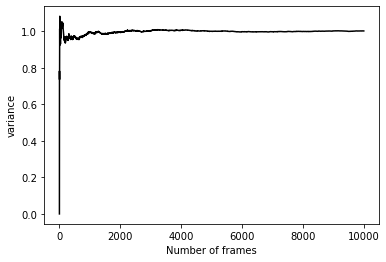

In [15]:
data = np.loadtxt("../Exercises/Exercise_3/colvar")

plt.plot( data[2:,0], np.sqrt((data[2:,0]/(data[2:,0]-1))*data[2:,1]), 'k-')
plt.xlabel("Number of frames")
plt.ylabel('variance')
plt.show()

### Exercise 4:  Calculating block averages

The filled in plumed input is as follows:

In [16]:
pex4 = '''data: READ FILE=../../data/uncorrelated_data VALUES=rand
          av: AVERAGE ARG=data STRIDE=1 CLEAR=500
          PRINT ARG=av STRIDE=500 FILE=colvar'''

We can run PLUMED using this input from python as follows.

In [17]:
# Make a directory to hold the exercise
!mkdir ../Exercises/Exercise_4
# Output the input file to the plumed.dat file
f = open("../Exercises/Exercise_4/plumed.dat", "w")
f.write( pex4 )
f.close()
# Run PLUMED
!cd ../Exercises/Exercise_4 && plumed driver --noatoms > /dev/null

We now generate a graph showing the block averages and the original data

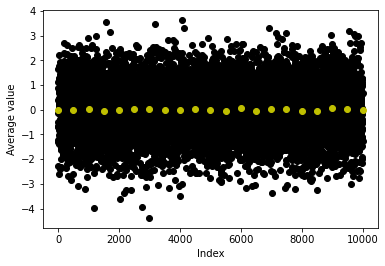

In [18]:
data = np.loadtxt("../data/uncorrelated_data")
averages = np.loadtxt("../Exercises/Exercise_4/colvar")

plt.plot( data[:,0], data[:,1], 'ko')
plt.plot( averages[:,0], averages[:,1], 'yo')
plt.xlabel("Index")
plt.ylabel('Average value')
plt.show()

In the cell below we evaluate the variance using the full data set.  We also calculate the variance of the block averages.  As you can see from the cell below the estimate of the variance that you obtain using:

$$
\textrm{var}(\overline{X}) = \frac{\textrm{var}(X)}{N}
$$

is very similar to the variance that we get by calculating a variance using the estimates of the mean.

In [19]:
# Calculate variance for whole data set.
data = np.loadtxt("../data/uncorrelated_data")
N = len(data[:,1])
mu = sum(data[:,1]) / N 
var = (N/(N-1))*( sum(data[:,1]*data[:,1])/N - mu*mu )
# Calculate variance for blocks 
avd = np.loadtxt("../Exercises/Exercise_4/colvar")
Nd = len(avd[1:,1])
mud = sum(avd[1:,1]) / Nd 
vard = (Nd/(Nd-1))*( sum(avd[1:,1]*avd[1:,1])/Nd - mud*mud )

# Now work out variance of mean using analytic result
varb = var / 500 
print("Variance from blocks", vard)
print("Variance from analytic resul", varb)

Variance from blocks 0.0014156487162394736
Variance from analytic resul 0.002007578590703089


### Exercise 5:  Free energy from block averages

The filled in plumed input is as follows:

In [22]:
pex5 = '''UNITS NATURAL
          data: READ FILE=../../data/uncorrelated_data VALUES=rand
          hhh: HISTOGRAM ARG=data STRIDE=1 GRID_MIN=-4.5 GRID_MAX=4.5 GRID_BIN=100 CLEAR=1000 KERNEL=DISCRETE
          DUMPGRID GRID=hhh FILE=hist.dat STRIDE=1000'''

We can run PLUMED using this input from python as follows.

In [23]:
# Make a directory to hold the exercise
!mkdir ../Exercises/Exercise_5
# Output the input file to the plumed.dat file
f = open("../Exercises/Exercise_5/plumed.dat", "w")
f.write( pex5 )
f.close()
# Run PLUMED
!cd ../Exercises/Exercise_5 && plumed driver --noatoms > /dev/null

mkdir: ../Exercises/Exercise_5: File exists


We can read in the output free energy surface as follows.  PLUMED outputs $j$ histograms from the data.  We can then calculate the average free energy in the $i$th bin using:

$$
F_i = -k_B T \ln \left( \frac{1}{N} \sum_{j=1}^N H_i^{(j)} \right)
$$

The error on this estimate of the free energy is evaluated using:

$$
\sigma_{F_i} = -\frac{1}{\frac{1}{N} \sum_{j=1}^N H_i^{(j)}} \sqrt{\frac{1}{N-1}\left[\frac{1}{N}\sum_{j=1}^N(H_i^{(j)})^2 - \left( \frac{1}{N}\sum_{j=1}^N H_i^{(j)} \right)^2  \right]}
$$

/Users/gareth/opt/anaconda3/envs/plumed-masterclass/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/Users/gareth/opt/anaconda3/envs/plumed-masterclass/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


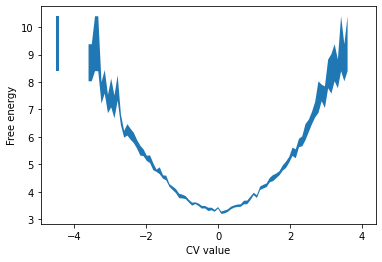

In [24]:
import glob

hist1 = np.loadtxt("../Exercises/Exercise_5/hist.dat")
N, average, average2 = 1, hist1[:,1], hist1[:,1]*hist1[:,1]
for filen in glob.glob( "../Exercises/Exercise_5/analysis.*.hist.dat") : 
    histn = np.loadtxt(filen)
    N, average, average2 = N + 1, average + histn[:,1], average2 + histn[:,1]*histn[:,1]
    
# Final averages 
average = average / N
# Final variances
var = (N/(N-1))*( average2 / N - average*average ) 
# Errors
error = np.sqrt( var / N )

# Convert to free energy 
fes = -np.log( average )
# Convert to error in fes
ferr = error / average 

# And draw graph of free energy surface
plt.fill_between( hist1[:,0], fes-ferr, fes+ferr )
plt.xlabel("CV value")
plt.ylabel('Free energy')
plt.show()

### Exercise 6: Calculating bootstrap averages

We read in the first 200 points in uncorrelated_data into the NumPy array called data here.  We then calculate 200 bootstrap averages from the data.

In [25]:
ddd = np.loadtxt("../data/uncorrelated_data")
data = ddd[0:500,1]

bootstraps = np.zeros(200)
for i in range(200) : 
    av = 0
    for j in range(500) : av = av + data[np.random.randint(0,500)]
    bootstraps[i] = av / 500 

We now calculate the variance from the bootstrap averages and to see if the variance is the same as the one we would expected given the analytic result.  As you can see below these two variances are similar.

In [26]:
# Calculate variance of bootstrap averages
nb = len(bootstraps)
mub = sum(bootstraps) / nb 
varb = (nb/(nb-1))*( sum(bootstraps*bootstraps) / nb - mub*mub )
# Calculate variance of data points
nd = len(data)
mud = sum(data) / len(data)
vard = (nd/(nd-1))*( sum(data*data) / nd - mud*mud )
# Now analytic variance
anvar = vard / nd 
print( "Bootstrap variance is", varb )
print( "Analytic estimate is", anvar )

Bootstrap variance is 0.0017526812038427425
Analytic estimate is 0.0019021077539920568


### Exercise 7: Dealing with correlated data

Lets first show that the variance we get for the data in `correlated_data` from the block averaging is smaller than the variance we get from bootstrapping.

In [27]:
# Read the data
data = np.loadtxt("../data/correlated_data")
# Do the block averages
bsize, bav = int( len(data[:,1]) / 10 ), np.zeros(10)
for i in range(10) : 
    bav[i] = sum( data[i*bsize:(i+1)*bsize, 1 ] ) / bsize 
mean = sum( bav ) / 10
var = (10/9)*( sum(bav*bav) / 10 - mean*mean )
print( "From block averaging of size", bsize, "average is", mean, "and error is", np.sqrt( var/10) )

# Do bootstrapping based on first 1000 points in file
ddd = data[0:1000,1]
bootstraps = np.zeros(200)
for i in range(200) : 
    av = 0
    for j in range(bsize) : av = av + ddd[np.random.randint(0,bsize)]
    bootstraps[i] = av / bsize 
    
mean = sum( bootstraps ) / 200 
var = (200/199)*(sum(bootstraps*bootstraps)/200 - mean*mean)
print( "From 200 bootstraps averages of size", bsize, "average is", mean, "and error is", np.sqrt(var) )

From block averaging of size 1000 average is 0.48370867402277096 and error is 0.0787277859937524
From 200 bootstraps averages of size 1000 average is 0.2436395303124279 and error is 0.030633098190470946


You can see that the error bar is clearly underestimated when we do the bootstrapping because there are correlations in the time series.

In [28]:
pex7 = '''data: READ FILE=../../data/correlated_data VALUES=rand
av5: AVERAGE ARG=data STRIDE=1 CLEAR=5
PRINT ARG=av5 FILE=colvar5 STRIDE=5
av10: AVERAGE ARG=data STRIDE=1 CLEAR=10
PRINT ARG=av10 FILE=colvar10 STRIDE=10
av15: AVERAGE ARG=data STRIDE=1 CLEAR=15
PRINT ARG=av15 FILE=colvar15 STRIDE=15
av20: AVERAGE ARG=data STRIDE=1 CLEAR=20
PRINT ARG=av20 FILE=colvar20 STRIDE=20
av25: AVERAGE ARG=data STRIDE=1 CLEAR=25
PRINT ARG=av25 FILE=colvar25 STRIDE=25
av30: AVERAGE ARG=data STRIDE=1 CLEAR=30
PRINT ARG=av30 FILE=colvar30 STRIDE=30
av35: AVERAGE ARG=data STRIDE=1 CLEAR=35
PRINT ARG=av35 FILE=colvar35 STRIDE=35
av40: AVERAGE ARG=data STRIDE=1 CLEAR=40
PRINT ARG=av40 FILE=colvar40 STRIDE=40
av45: AVERAGE ARG=data STRIDE=1 CLEAR=45
PRINT ARG=av45 FILE=colvar45 STRIDE=45
av50: AVERAGE ARG=data STRIDE=1 CLEAR=50
PRINT ARG=av50 FILE=colvar50 STRIDE=50
av55: AVERAGE ARG=data STRIDE=1 CLEAR=55
PRINT ARG=av55 FILE=colvar55 STRIDE=55
av60: AVERAGE ARG=data STRIDE=1 CLEAR=60
PRINT ARG=av60 FILE=colvar60 STRIDE=60
av65: AVERAGE ARG=data STRIDE=1 CLEAR=65
PRINT ARG=av65 FILE=colvar65 STRIDE=65
av70: AVERAGE ARG=data STRIDE=1 CLEAR=70
PRINT ARG=av70 FILE=colvar70 STRIDE=70'''

Now run the code to generate all the averages

In [29]:
# Make a directory to hold the exercise
!mkdir ../Exercises/Exercise_7
# Output the input file to the plumed.dat file
f = open("../Exercises/Exercise_7/plumed.dat", "w")
f.write( pex7 )
f.close()
# Run PLUMED
!cd ../Exercises/Exercise_7 && plumed driver --noatoms > /dev/null

Now we can calculate and plot the averages and errors for the various block sizes and draw a graph to see how the errors converge.

Read 5.0 number 2001 average 0.48348849175412273 error 0.021510508229470128
Read 10.0 number 1001 average 0.4832469810189808 error 0.02936554079679872
Read 15.0 number 667 average 0.4822621454272866 error 0.03476280411550564
Read 20.0 number 501 average 0.48276471856287423 error 0.038795274878869156
Read 25.0 number 401 average 0.4825239351620944 error 0.04188937068774596
Read 30.0 number 334 average 0.4815401916167672 error 0.045022040807708594
Read 35.0 number 286 average 0.4790319125874125 error 0.04737253314617318
Read 40.0 number 251 average 0.48180300796812753 error 0.049201807814775185
Read 45.0 number 223 average 0.48082040358744377 error 0.05118011816384102
Read 50.0 number 201 average 0.48132363184079613 error 0.05209080984895531
Read 55.0 number 182 average 0.4752758351648352 error 0.05362537483067173
Read 60.0 number 167 average 0.47544002395209595 error 0.05522921830931002
Read 65.0 number 154 average 0.4740329545454545 error 0.05625518066698842
Read 70.0 number 143 averag

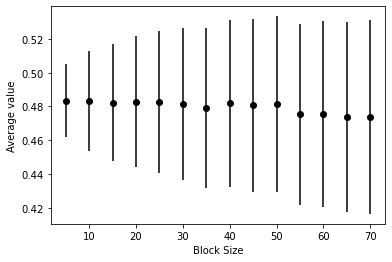

In [30]:
bsize, bav, berr = np.zeros(14), np.zeros(14), np.zeros(14) 
for i in range(14) :
    bsize[i] = (i+1)*5
    data = np.loadtxt( "../Exercises/Exercise_7/colvar" + str(int(bsize[i])) )
    N = len(data[:,1])
    bav[i] = sum(data[:,1]) / N
    berr[i] = np.sqrt( (1/(N-1))*( sum(data[:,1]*data[:,1]) / N - bav[i]*bav[i] ) )
    print("Read", bsize[i], "number", N, "average", bav[i], "error", berr[i] )
    
plt.errorbar( bsize, bav, yerr=berr, fmt='ko' )
plt.xlabel("Block Size")
plt.ylabel("Average value")
plt.show()

### Exercise 8: Weighted averages

The filled in plumed input is as follows:

In [31]:
pex8 = '''UNITS NATURAL # This ensures that Boltzmann's constant is one 
          data: READ FILE=../../data/weighted_data VALUES=rand IGNORE_FORCES 
          mm: RESTRAINT ARG=data AT=0.6 KAPPA=4 
          rw: REWEIGHT_BIAS TEMP=1 
          PRINT ARG=data,rw FILE=reweight
          wav: AVERAGE ARG=data STRIDE=1 LOGWEIGHTS=rw
          dd: CUSTOM ARG=data,wav FUNC=(x-y)*(x-y) PERIODIC=NO
          uvar: AVERAGE ARG=dd STRIDE=1 LOGWEIGHTS=rw NORMALIZATION=false
          one: CONSTANT VALUE=1
          wsum: AVERAGE ARG=one STRIDE=1 LOGWEIGHTS=rw NORMALIZATION=false
          var: CUSTOM ARG=uvar,wsum FUNC=x/(y-1) PERIODIC=NO
          PRINT ARG=wav,var STRIDE=1 FILE=colvar
          hhh: HISTOGRAM ARG=data LOGWEIGHTS=rw GRID_MIN=0 GRID_MAX=1 GRID_BIN=20 CLEAR=1000 NORMALIZATION=true KERNEL=DISCRETE
          DUMPGRID GRID=hhh FILE=hist.dat STRIDE=1000'''


We can now use PLUMED to run the calculation

In [32]:
# Make a directory to hold the exercise
!mkdir ../Exercises/Exercise_8
# Output the input file to the plumed.dat file
f = open("../Exercises/Exercise_8/plumed.dat", "w")
f.write( pex8 )
f.close()
# Run PLUMED
!cd ../Exercises/Exercise_8 && plumed driver --noatoms > /dev/null

Lets first plot the average and variance as a function of sample size

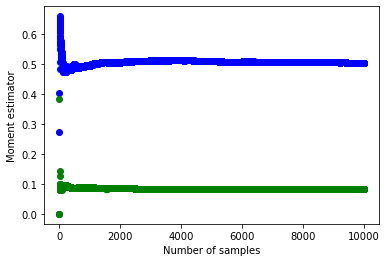

In [33]:
data = np.loadtxt("../Exercises/Exercise_8/colvar")

plt.plot( data[:,0], data[:,1], 'bo')
plt.plot( data[:,0], data[:,2], 'go')
plt.xlabel("Number of samples")
plt.ylabel("Moment estimator")
plt.show()

The cell below merges all the estimates of histogram and calculates the error bar on the estimate of the fes.  Notice that the value of the average histogram in the $i$th bin is now calculated as the following weighted average:

$$
\overline{H}_i = \frac{\sum_{j=1}^N W_j H_i^{(j)}}{\sum_{j=1}^N W_j }
$$

The sums in this weighted average run over the $N$ estimates of the histogram that were extracted from the simulations.  The $W_j$ values are then the total weights of all the points that were used to estimate the $j$th histogram.  This quantity is stored in the line of the grid file that says `#! SET normalisation`. 

The free energy is then evaluated on from the average histogram using:

$$
F_i = -k_B T \ln \left( \overline{H}_i \right)
$$

The error on this estimate of the free energy is evaluated using:

$$
\sigma_{F_i} = \frac{1}{\overline{H}_i} \sqrt{\frac{ \sum_{j=1}^N W_j^2 ( H_i^{(j)} - \overline{H}_i)^2 }{\left( \sum_{j=1}^N W_j \right)^2 }}
$$

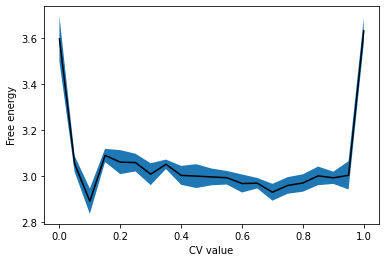

In [34]:
import glob

# Function to read in histogram data and normalization
def readhistogram( fname ) :
        # Read in the histogram data
        data = np.loadtxt( fname )
        with open( fname, "r" ) as myfile :
                for line in myfile :
                        if line.startswith("#! SET normalisation") : norm = line.split()[3]
        return float(norm), data

# Calculate weighted average
norm1, hist1 = readhistogram( "../Exercises/Exercise_8/hist.dat" )
N, average = norm1, norm1*hist1[:,1]
for filen in glob.glob( "../Exercises/Exercise_8/analysis.*.hist.dat") : 
    norm, histn = readhistogram(filen)
    N, average = N + norm, average + norm*histn[:,1]
average = average / N

# Calculate errors
N1 = 1 
norm1, hist1 = readhistogram( "../Exercises/Exercise_8/hist.dat" )
error = norm1*norm1*(hist1[:,1]-average[:])**2
for filen in glob.glob( "../Exercises/Exercise_8/analysis.*.hist.dat") : 
    norm, histn = readhistogram(filen)
    error, N1 = error + norm*norm*(histn[:,1]-average[:])**2, N1+1
error = np.sqrt( (error / (N*N)) )

# Convert to free energy 
fes = -np.log( average )
# Convert to error in fes
ferr = error / average 

# And draw graph of free energy surface
plt.fill_between( hist1[:,0], fes-ferr, fes+ferr )
plt.plot( hist1[:,0], fes, 'k-' )
plt.xlabel("CV value")
plt.ylabel('Free energy')
plt.show()

### Exercise 9: The free energy from a biased simulation

Lets run the metadynamics simulation here

In [2]:
pex9a = '''UNITS NATURAL
COM ATOMS=1-7 LABEL=com
DISTANCE ATOMS=1,com LABEL=d1
UPPER_WALLS ARG=d1 AT=2.0 KAPPA=100.
DISTANCE ATOMS=2,com LABEL=d2
UPPER_WALLS ARG=d2 AT=2.0 KAPPA=100.
DISTANCE ATOMS=3,com LABEL=d3
UPPER_WALLS ARG=d3 AT=2.0 KAPPA=100.
DISTANCE ATOMS=4,com LABEL=d4
UPPER_WALLS ARG=d4 AT=2.0 KAPPA=100.
DISTANCE ATOMS=5,com LABEL=d5
UPPER_WALLS ARG=d5 AT=2.0 KAPPA=100.
DISTANCE ATOMS=6,com LABEL=d6
UPPER_WALLS ARG=d6 AT=2.0 KAPPA=100.
DISTANCE ATOMS=7,com LABEL=d7
UPPER_WALLS ARG=d7 AT=2.0 KAPPA=100.

c1: COORDINATIONNUMBER SPECIES=1-7 MOMENTS=2-3 SWITCH={RATIONAL R_0=1.5 NN=8 MM=16}

METAD ARG=c1.* HEIGHT=0.05 PACE=500 SIGMA=0.1,0.1 GRID_MIN=-1.5,-1.5 GRID_MAX=2.5,2.5 GRID_BIN=500,500 BIASFACTOR=5'''

In [3]:
pin = '''inputfile input.xyz
outputfile output.xyz
temperature 0.1
tstep 0.005
friction 1
forcecutoff 2.5
listcutoff  3.0
ndim 2
nstep 1000000
nconfig 100 trajectory.xyz
nstat   1000 energies.dat'''


In [4]:
f = open('../data/in','w')
f.write(pin)
f.close()

This bit runs our metadynamics simulation

In [5]:
# Copy everything from data to the exercises directory
!mkdir ../Exercises/Exercise_9
!cp ../data/in ../Exercises/Exercise_9
!cp ../data/input.xyz ../Exercises/Exercise_9
# Output the plumed input
f = open("../Exercises/Exercise_9/plumed.dat", "w")
f.write( pex9a )
f.close()

# And run plumed simplemd 
!cd ../Exercises/Exercise_9 && plumed simplemd < in > /dev/null

And the reweighting:

In [6]:
pex9b = '''UNITS NATURAL
c1: COORDINATIONNUMBER SPECIES=1-7 MOMENTS=2-3 SWITCH={RATIONAL R_0=1.5 NN=8 MM=16}
METAD ARG=c1.* HEIGHT=0.05 PACE=50000000 SIGMA=0.1,0.1 GRID_MIN=-1.5,-1.5 GRID_MAX=2.5,2.5 GRID_BIN=500,500 TEMP=0.1 BIASFACTOR=5 RESTART=YES
rw: REWEIGHT_BIAS TEMP=0.1
hh: HISTOGRAM ARG=c1.* GRID_MIN=-1.5,-1.5 GRID_MAX=2.5,2.5 GRID_BIN=200,200 BANDWIDTH=0.02,0.02 LOGWEIGHTS=rw CLEAR=2500 NORMALIZATION=true
DUMPGRID GRID=hh FILE=my_histogram.dat STRIDE=2500'''

In [7]:
# Output the plumed input
f = open("../Exercises/Exercise_9/plumed_reweight.dat", "w")
f.write( pex9b )
f.close()

!cd ../Exercises/Exercise_9 && plumed driver --plumed plumed_reweight.dat --ixyz trajectory.xyz  --initial-step 1 > /dev/null

We now merge all the estimates of the histogram from metadynamics using the script for merging weighted histograms from  the previous section.  Notice that as we are using NumPy arrays the fact that our free energy is two dimensional does not matter here. 

In [12]:
import glob

# Function to read in histogram data and normalization
def readhistogram( fname ) :
        # Read in the histogram data
        data = np.loadtxt( fname )
        with open( fname, "r" ) as myfile :
                for line in myfile :
                        if line.startswith("#! SET normalisation") : norm = line.split()[3]
        return float(norm), data[:,2]

# Calculate weighted average
norm1, hist1 = readhistogram( "../Exercises/Exercise_9/my_histogram.dat" )
N, average = norm1, norm1*hist1
for filen in glob.glob( "../Exercises/Exercise_9/analysis.*.my_histogram.dat") : 
    norm, histn = readhistogram(filen)
    N, average = N + norm, average + norm*histn
average = average / N

# Calculate errors 
norm1, hist1 = readhistogram( "../Exercises/Exercise_9/my_histogram.dat" )
error, nsum = norm1*norm1*(hist1-average)**2, norm1
for filen in glob.glob( "../Exercises/Exercise_9/analysis.*.my_histogram.dat") : 
    norm, histn = readhistogram(filen)
    error, nsum = error + norm*norm*(histn-average)**2, nsum + norm
error = np.sqrt( error / (nsum*nsum) )

# Convert to free energy 
fes = -0.1*np.log( average )
# Convert to error in fes
ferr = 0.1*error / average 

/Users/gareth/opt/anaconda3/envs/plumed-masterclass/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
/Users/gareth/opt/anaconda3/envs/plumed-masterclass/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


These are some auxiliaray functions to get the free number of bins in the grid that has been used for the histogram

In [9]:
def read_field_from_header( fname, field ) :
    with open( fname, "r" ) as myfile :
        for line in myfile :
            if line.startswith("#! SET " + field ) : v = line.split()[3]
    return v

def read_nbins( fname, cv1, cv2 ) :
    n1 = int( read_field_from_header( fname, "nbins_" + cv1  ) )
    if read_field_from_header( fname, "periodic_" + cv1 )=="false" : n1 = n1 + 1
    n2 = int( read_field_from_header( fname, "nbins_" + cv2  ) )
    if read_field_from_header( fname, "periodic_" + cv2 )=="false" : n2 = n2 + 1
    return n1, n2 

We now make our contout plots showing the free energy and the errors below

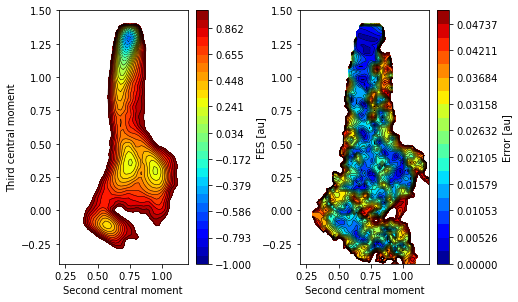

In [20]:
# Get the number of bins in the fes from the header 
nxbins, nybins = read_nbins( "../Exercises/Exercise_9/my_histogram.dat", "c1.moment-2", "c1.moment-3" )
x01,y01,z01,der,der= np.genfromtxt(r'../Exercises/Exercise_9/my_histogram.dat', unpack=True)
# Now make the data 
xvals = x01.reshape(nxbins,nybins)
yvals = y01.reshape(nxbins,nybins)
fes = fes.reshape(nxbins,nybins)
ferr= ferr.reshape(nxbins,nybins)
# Plot 
fig, (ax1,ax2) = plt.subplots(1,2)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.5)
ax1.contour( xvals, yvals, fes, levels=np.linspace(-1,1,30), linewidths=0.5, colors='k')
im1 = ax1.contourf( xvals, yvals, fes, levels=np.linspace(-1,1,30), cmap=cm.jet )
ax2.contour( xvals, yvals, ferr, levels=np.linspace(0,0.05,20), linewidths=0.5, colors='k' )
im2 = ax2.contourf( xvals, yvals, ferr, levels=np.linspace(0,0.05,20), cmap=cm.jet )
ax1.set_xlim(0.2, 1.2 )
ax1.set_ylim(-0.4, 1.5 )
ax2.set_xlim(0.2, 1.2 )
ax2.set_ylim(-0.4, 1.5 )
ax2.set_xlim(0.2, 1.2 )
ax1.set_xlabel("Second central moment")
ax2.set_xlabel("Second central moment")
ax1.set_ylabel("Third central moment")
fig.colorbar(im1, ax=ax1, label="FES [au]")
fig.colorbar(im2, ax=ax2, label="Error [au]")
plt.show()

Lets finish by calculating the dependence of the error bar size on the length of the blocks

In [18]:
bsizes = np.array([100,200,250,500,1000,2000,2500,5000])
pex9c = '''UNITS NATURAL
c1: COORDINATIONNUMBER SPECIES=1-7 MOMENTS=2-3 SWITCH={RATIONAL R_0=1.5 NN=8 MM=16}
METAD ARG=c1.* HEIGHT=0.05 PACE=50000000 SIGMA=0.1,0.1 GRID_MIN=-1.5,-1.5 GRID_MAX=2.5,2.5 GRID_BIN=500,500 TEMP=0.1 BIASFACTOR=5 RESTART=YES
rw: REWEIGHT_BIAS TEMP=0.1'''
for size in bsizes : 
    sz = str(size)
    pex9c = pex9c + "\n hh" + sz + ": HISTOGRAM ARG=c1.* GRID_MIN=-1.5,-1.5 GRID_MAX=2.5,2.5 GRID_BIN=200,200 BANDWIDTH=0.02,0.02 LOGWEIGHTS=rw NORMALIZATION=true CLEAR=" + sz + "\n" 
    pex9c = pex9c + "DUMPGRID GRID=hh" + sz + " FILE=hist" + sz + ".dat STRIDE=" + sz + "\n"

In [19]:
# Output the plumed input
f = open("../Exercises/Exercise_9/plumed_blocks.dat", "w")
f.write( pex9c )
f.close()

!cd ../Exercises/Exercise_9 && plumed driver --plumed plumed_blocks.dat --ixyz trajectory.xyz  --initial-step 1 > /dev/null 

In [20]:
def averr(fname) : 
    # Calculate weighted average
    norm1, hist1 = readhistogram( "../Exercises/Exercise_9/" + fname )
    N, average = norm1, norm1*hist1
    for filen in glob.glob( "../Exercises/Exercise_9/analysis.*." + fname ) : 
        norm, histn = readhistogram(filen)
        N, average = N + norm, average + norm*histn
    average = average / N

    # Calculate errors 
    norm1, hist1 = readhistogram( "../Exercises/Exercise_9/" + fname )
    error, nsum = norm1*norm1*(hist1-average)**2, norm1
    for filen in glob.glob( "../Exercises/Exercise_9/analysis.*." + fname ) : 
        norm, histn = readhistogram(filen)
        error, nsum = error + norm*norm*(histn-average)**2, nsum + norm
    error = np.sqrt( error / (nsum*nsum) )

    # Convert to error in fes
    ferr = 0.1*error / average 
    #ferr = 0.1*error / average 
    return np.nanmean(ferr)

In [21]:
yv =np.zeros(len(bsizes))
for i in range(len(bsizes)) : yv[i] = averr("hist" + str(bsizes[i]) + ".dat")
print( yv )

/Users/gareth/opt/anaconda3/envs/plumed-masterclass/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


[0.04672599 0.04592321 0.04397144 0.0412036  0.0385724  0.03706657
 0.0314594  0.02327793]


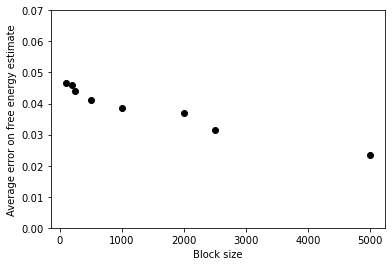

In [22]:
plt.plot( bsizes, yv, 'ko' )
plt.ylim(0,0.07)
plt.xlabel("Block size")
plt.ylabel("Average error on free energy estimate")
plt.show()